Source : https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501


**Data Description**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. 32)

Ten real-valued features are computed for each cell nucleus:

a. radius (mean of distances from center to points on the perimeter) 

b. texture (standard deviation of gray-scale values)

c. perimeter

d. area

e. smoothness (local variation in radius lengths)

f. compactness (perimeter^2 / area - 1.0)

g. concavity (severity of concave portions of the contour)

h. concave points (number of concave portions of the contour)

i. symmetry

j. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

#what i will do?
- modelling using all the classification algorithms.
- select different features and apply all the classification algorithms.
- apply cross validation using kFold and stratified kFold and also using cross_val_score.
- ensemble methods.
- apply all the different matrics for the classification task.
- saving the model.
- After finish this making a template for classification, where all the algotithm's hyper-parameter that can be tune will be defined.

In [ ]:
# Basic library for data processing and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset

#picking the file to read from the drive 
drive_url = 'https://drive.google.com/file/d/1Vf3Jb7Rhpbidd_ECsmIawwQ8A4Aor4xi/view?usp=sharing' #Read the Excel Sheet, which contains 4000 House properties scraped from zolo.ca.
new_url = 'https://drive.google.com/uc?export=download&id=' + drive_url.split('/')[-2] #Save into temporary location

data = pd.read_csv(new_url)

# first 5 samples from dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Dropping unnamed:32 and id column
data.drop(columns=['Unnamed: 32','id'],axis=1,inplace=True)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

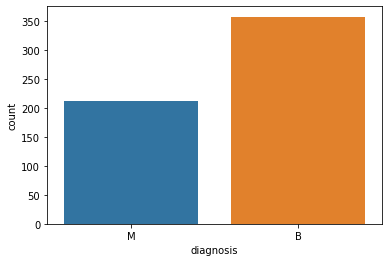

In [ ]:
# checking the number of malignant and benign samples
sns.countplot(x='diagnosis',data=data)

In [ ]:
# let's see the statistical summary of the data
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# we would consider mean values of all the attributes for the project
features_mean = list(data.columns[1:11])
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

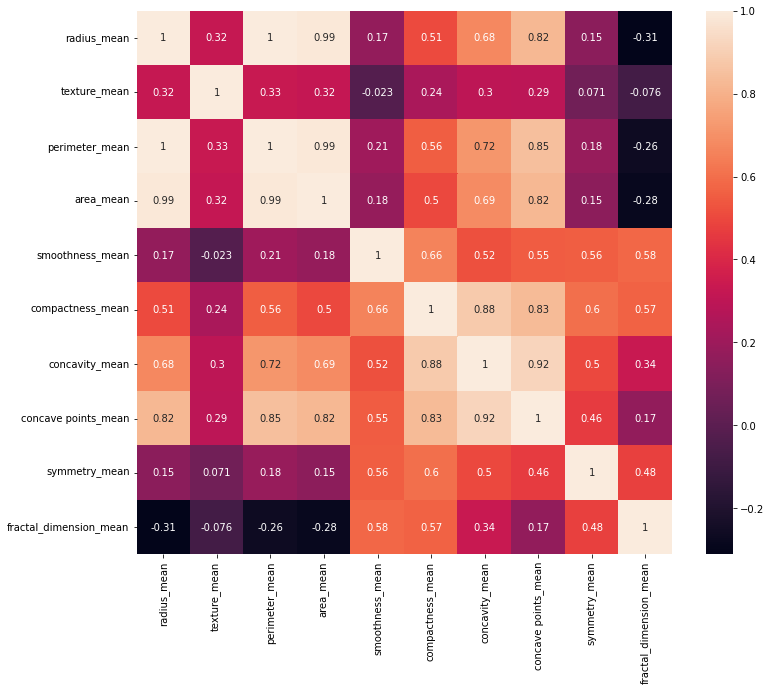

In [ ]:
# let's start with the correlation between them
corr = data[features_mean].corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr,annot=True)

**Can I simply remove one of two predictor variables that are highly linearly correlated?**

Example:

B=V/3000 and E=V∗D

B and E have ρ=0.989

Both B and E are derived from V. B and E are clearly not truly "independent" variables from each other. The underlying variable that really matters here is V. You should probably disgard both B and E in this case and keep V only.

In a more general situation, when you have two independent variables that are very highly correlated, you definitely should remove one of them because you run into the multicollinearity conundrum and your regression model's regression coefficients related to the two highly correlated variables will be unreliable. Also, in plain English if two variables are so highly correlated they will obviously impart nearly exactly the same information to your regression model. But, by including both you are actually weakening the model. You are not adding incremental information. Instead, you are infusing your model with noise. Not a good thing.

One way you could keep highly correlated variables within your model is to use instead of regression a Principal Component Analysis (PCA) model. PCA models are made to get rid off multicollinearity. The trade off is that you end up with two or three principal components within your model that are often just mathematical constructs and are pretty much incomprehensible in logical terms. PCA is therefore frequently abandoned as a method whenever you have to present your results to an outside audience such as management, regulators, etc... PCA models create cryptic black boxes that are very challenging to explain.

This correlation heatmap illustrates that radius_mean,perimeter_mean and area_mean are highly correlated with each other. Moreover, compactness_mean,concavity_mean and concave_points_mean are also highly related. So, we only take only feature among the highly correlated features.

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [ ]:
features_mean = ['radius_mean', 'texture_mean','smoothness_mean', 'compactness_mean','symmetry_mean', 'fractal_dimension_mean']

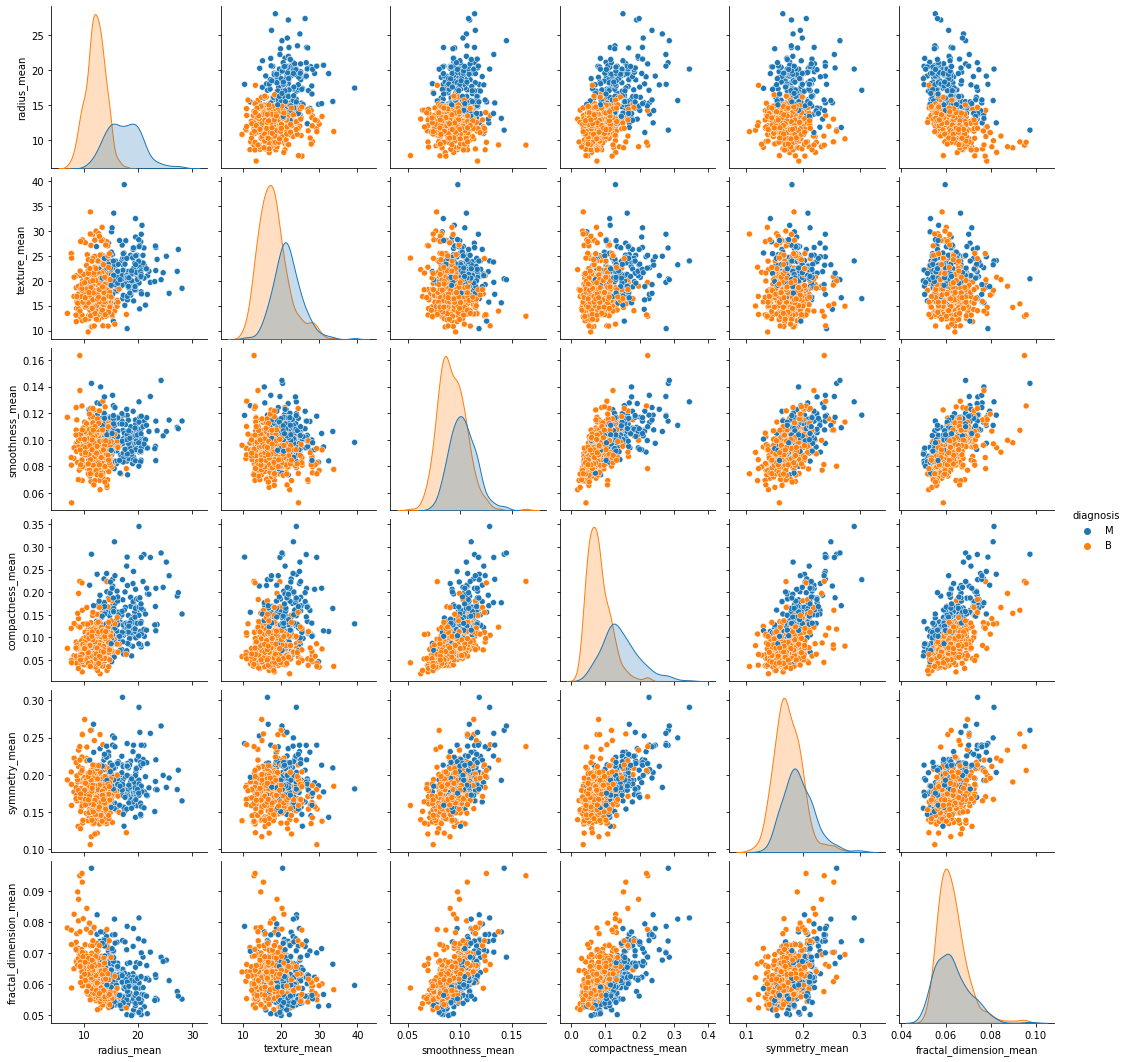

In [ ]:
temp_data = pd.concat([data[features_mean],data['diagnosis']],axis=1)
sns.pairplot(temp_data,hue='diagnosis')

We can remove fractal_dimension_mean and symmetry_mean features as an experiment because from the diagram it can be stated that it is difficult to identify whether a person is benign or malignant using these feature.

In [ ]:
exp1 = ['radius_mean', 'texture_mean','smoothness_mean', 'compactness_mean']

In [ ]:
from sklearn.model_selection import train_test_split

#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3,random_state=42)
train.shape,test.shape

((398, 31), (171, 31))

In [ ]:
# train and test data based on features_mean column
X_train = train[features_mean]
y_train = train['diagnosis']
X_test = test[features_mean]
y_test = test['diagnosis']

#Modelling using different classification algorithms
1. Logistic Regression
2. Support Vector Machines
3. Decision Trees
4. Random Forest 
5. K-Nearest Neighbors
6. Naive Bayes



In [ ]:
from sklearn import metrics

def train_and_predict(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  pred = clf.predict(X_test)
  score = metrics.accuracy_score(pred,y_test)
  return score,pred

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
score, pred = train_and_predict(lr_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9181286549707602


In [ ]:
from sklearn.svm import SVC
sv_clf = SVC()
score, pred = train_and_predict(sv_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.8947368421052632


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
score, pred = train_and_predict(dtc_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9415204678362573


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
score, pred = train_and_predict(rf_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9649122807017544


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
score, pred = train_and_predict(knn_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.8771929824561403


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
score, pred = train_and_predict(gnb_clf,X_train,y_train,X_test,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9122807017543859


From above 6 model all the models having the almost same accuracy around 90% except Random Forest Classifier. We further check whether model it overfitting on training data using cross validation. We also try ensemble methods.


##Trying above models using dataset without fractal_dimension_mean and symmetry_mean feature.


In [ ]:
# New train test split
X_train_exp1 = train[exp1]
X_test_exp1 = test[exp1]

In [ ]:
lr_clf1 = LogisticRegression()
score, pred = train_and_predict(lr_clf1,X_train_exp1,y_train,X_test_exp1,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9181286549707602


In [ ]:
from sklearn.svm import SVC
sv_clf1 = SVC()
score, pred = train_and_predict(sv_clf1,X_train_exp1,y_train,X_test_exp1,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.8947368421052632


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf1 = DecisionTreeClassifier()
score, pred = train_and_predict(dtc_clf1,X_train_exp1,y_train,X_test_exp1,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9298245614035088


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
score, pred = train_and_predict(rf_clf1,X_train_exp1,y_train,X_test_exp1,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9590643274853801


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf1 = KNeighborsClassifier()
score, pred = train_and_predict(knn_clf1,X_train_exp1,y_train,X_test_exp1,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.8771929824561403


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_clf1 = GaussianNB()
score, pred = train_and_predict(gnb_clf1,X_train_exp1,y_train,X_test_exp1,y_test)
print(f'accuracy score is {score}')

accuracy score is 0.9181286549707602


After removing two features all the results are exactly same except the Gaussian Naive Bayes model. So we can conclude that removed features is not important for classification. In other words their contribution to the classification task is negligible.

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
rf_clf2 = RandomForestClassifier()
scores = cross_val_score(rf_clf2,data[exp1],data['diagnosis'],cv=5)
print(f'scores of cross validation is {scores}')

scores of cross validation is [0.89473684 0.90350877 0.96491228 0.97368421 0.89380531]


In [ ]:
# With changing the scoring method
rf_clf2 = RandomForestClassifier()
scores = cross_val_score(rf_clf2,data[exp1],data['diagnosis'],cv=5,scoring='recall_macro') #scoring = ['precision_macro', 'recall_macro', 'balanced_accuracy']
print(f'scores of cross validation is {scores}')

scores of cross validation is [0.85096626 0.89289224 0.95039683 0.94543651 0.91549296]


In [ ]:
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro', 'balanced_accuracy']

rf_clf2 = RandomForestClassifier()
scores = cross_validate(rf_clf2,data[exp1],data['diagnosis'],cv=5,scoring=scoring) 
scores

{'fit_time': array([0.17955375, 0.17343497, 0.18421888, 0.16280079, 0.16318107]),
 'score_time': array([0.01701856, 0.01596999, 0.01605797, 0.01850581, 0.0159409 ]),
 'test_balanced_accuracy': array([0.88126433, 0.90452014, 0.95039683, 0.95238095, 0.91063045]),
 'test_precision_macro': array([0.91452991, 0.92763158, 0.95506181, 0.97368421, 0.88603405]),
 'test_recall_macro': array([0.88126433, 0.90452014, 0.95039683, 0.95238095, 0.91063045])}

**The cross_validate function differs from cross_val_score in two ways:**

- It allows specifying multiple metrics for evaluation.

- It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

## Cross-validaion using kFold

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(4)
folds = kf.split(data)

In [ ]:
kfold_score = []
for train_k,test_k in folds:
  rf_clf_k = RandomForestClassifier()
  X_train = data.loc[train_k,exp1]
  y_train = data.loc[train_k,'diagnosis']
  X_test = data.loc[test_k,exp1]
  y_test = data.loc[test_k,'diagnosis']
  score,pred = train_and_predict(rf_clf_k,X_train,y_train,X_test,y_test)
  kfold_score.append(score)

print(kfold_score)

[0.8461538461538461, 0.9366197183098591, 0.971830985915493, 0.9014084507042254]


## Cross-validaion using StratifiedkFold

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(4)
folds = skf.split(data[exp1],data['diagnosis'])

In [ ]:
kfold_score = []
for train_k,test_k in folds:
  rf_clf_k = RandomForestClassifier()
  X_train = data.loc[train_k,exp1]
  y_train = data.loc[train_k,'diagnosis']
  X_test = data.loc[test_k,exp1]
  y_test = data.loc[test_k,'diagnosis']
  score,pred = train_and_predict(rf_clf_k,X_train,y_train,X_test,y_test)
  kfold_score.append(score)

print(kfold_score)

[0.8951048951048951, 0.9014084507042254, 0.971830985915493, 0.9084507042253521]


From cross-validation we can say that our model is on an average 90% correct, in some split it give 95% test sample right.

#Ensemble methods

In [ ]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3,random_state=42)

# train and test data based on features_mean column
X_train = train[exp1]
y_train = train['diagnosis']
X_test = test[exp1]
y_test = test['diagnosis']

##Voting classifier 
- **hard voting**
- **soft voting**

In [ ]:
from sklearn.ensemble import VotingClassifier
log_clf_vc = LogisticRegression()
rnd_clf_vc = RandomForestClassifier()
svm_clf_vc = SVC()
knn_clf_vc = KNeighborsClassifier()
gnb_clf_vc = GaussianNB()
dt_clf_vc = DecisionTreeClassifier()

estimators = [('lr', log_clf_vc), ('rf', rnd_clf_vc), ('svc', svm_clf_vc),('knn', knn_clf_vc),('gnb', gnb_clf_vc),('dt', dt_clf_vc)]
voting_clf = VotingClassifier(estimators=estimators,voting='hard')

In [ ]:
for clf in (log_clf_vc, rnd_clf_vc, svm_clf_vc,knn_clf_vc, gnb_clf_vc, dt_clf_vc, voting_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,metrics.accuracy_score(y_test,y_pred))

LogisticRegression 0.9181286549707602
RandomForestClassifier 0.9649122807017544
SVC 0.8947368421052632
KNeighborsClassifier 0.8771929824561403
GaussianNB 0.9181286549707602
DecisionTreeClassifier 0.9415204678362573
VotingClassifier 0.9298245614035088


If all classifiers are able to estimate class probabilities (i.e., they have a predict_proba() method), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called **soft voting**. It often achieves higher performance than hard voting because it gives moreweight to highly confident votes. 

All you need to do is replace voting="hard" with
voting="soft" and ensure that all classifiers can estimate class probabilities

In [ ]:
from sklearn.ensemble import VotingClassifier
log_clf_vc = LogisticRegression()
rnd_clf_vc = RandomForestClassifier()
svm_clf_vc = SVC(probability=True)
knn_clf_vc = KNeighborsClassifier()
gnb_clf_vc = GaussianNB()
dt_clf_vc = DecisionTreeClassifier()

estimators = [('lr', log_clf_vc), ('rf', rnd_clf_vc), ('svc', svm_clf_vc),('knn', knn_clf_vc),('gnb', gnb_clf_vc),('dt', dt_clf_vc)]
voting_clf = VotingClassifier(estimators=estimators,voting='soft')

In [ ]:
for clf in (log_clf_vc, rnd_clf_vc, svm_clf_vc,knn_clf_vc, gnb_clf_vc, dt_clf_vc, voting_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,metrics.accuracy_score(y_test,y_pred))

LogisticRegression 0.9181286549707602
RandomForestClassifier 0.9590643274853801
SVC 0.8947368421052632
KNeighborsClassifier 0.8771929824561403
GaussianNB 0.9181286549707602
DecisionTreeClassifier 0.935672514619883
VotingClassifier 0.9415204678362573


##Bagging classifier

Bagging classifier trains on n_estimators using ramdomly sampled data from the training set with replacement.

The BaggingClassifier automatically performs soft voting
instead of hard voting if the base classifier can estimate class proba‐
bilities (i.e., if it has a predict_proba() method), which is the case
with Decision Trees classifiers.

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc_clf = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=10)
bc_clf.fit(X_train,y_train)
y_pred = bc_clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9649122807017544

The BaggingClassifier class supports sampling the features as well.
This is controlled by two hyperparameters: max_features and bootstrap_features. They work
the same way as max_samples and bootstrap, but for feature sampling instead of
instance sampling. Thus, each predictor will be trained on a random subset of the
input features.

Sampling both training instances and features is called the **Random
Patches method**. 

Keeping all training instances (i.e., bootstrap=False and max_samples=1.0) but sampling features (i.e., bootstrap_features=True and/or max_features smaller than 1.0) is called the **Random Subspaces method**.

We can use GridSearch to tune this hyperparameters.

##Boosting

Boosting refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. 

###AdaBoost
One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted.

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

**Base definition**:
class sklearn.ensemble.AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adc_clf = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
adc_clf.fit(X_train,y_train)
y_pred = adc_clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9415204678362573

In [ ]:
# Default estimator is decision tree if nothing is given
print(adc_clf.base_estimator_)

DecisionTreeClassifier(max_depth=1)


### GradientBoostClassifier

sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train,y_train)
y_score = gbc_clf.predict_proba(X_test)
y_pred = gbc_clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9649122807017544

### XGBoostClassifier

https://www.youtube.com/watch?v=GrJP9FLV3FE&list=PLblh5JKOoLULU0irPgs1SnKO6wqVjKUsQ&index=6

implement xgboost using the above link.


# Evaluation Metrics/Performance measurement

## Confusion Matrix
- Each row in a confusion matrix represents an actual class, while each column repre‐sents a predicted class

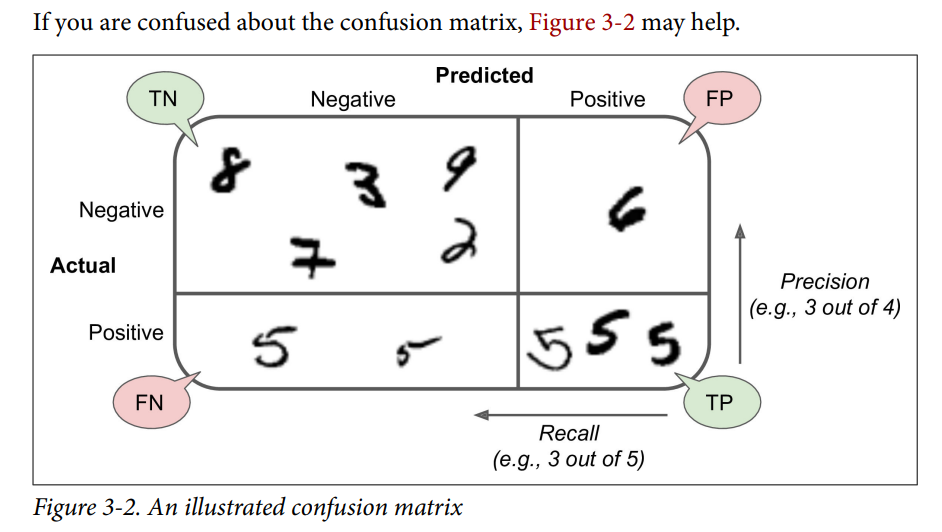

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[106,   2],
       [  4,  59]])

## Precision
- The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric.
- The accuracy of the positive pre‐dictions; this is called the precision of the classifier

**Precision = TP/(TP+FP)**

- it is a ratio of true positive prediction out o\f total positive prediction.

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,pos_label='B')

0.9636363636363636

## Recall
- True Positive Rate(TPR): This is the ratio of positive instances that are correctly detected by the classifier out of total positive instances.

**Recall = TP/(TP+FN)**


In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,pos_label='B')

0.9814814814814815

## F1 score
- It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers.
- The F1 score is the harmonic mean of precision and recall.

**F1 = 2PR/(PR)**

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,pos_label='B')

0.9724770642201834

**Classification report which will give all three above(precision,recall,f1_score) with macro and weighted avg.**

- **macro** : It is mean of all the classes. For example precision with macro is nothing but mean of precision of all the classes.
- **micro** : We first sum the respective TP, FP, and FN values across all classes and then plug them into precision,recall and f1_score equation.
- **Weighted Average** : here weight for each class is support of that class.
Support refers to the number of actual occurrences of the class in the dataset.

**Note**: We calculate TP,FP,TN,FN in multiclass considering one class as positive class and rest all as negative.

https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



##Precision-Recall Curve

- A high-precision classifier is not very useful if its recall is too low!


In [ ]:
# first 5 predicted probabilities
# one probability is for positive class and one for negative class.
# for curve we need only one of them
y_score[0:5]

array([[0.95712152, 0.04287848],
       [0.00198525, 0.99801475],
       [0.01245724, 0.98754276],
       [0.86481902, 0.13518098],
       [0.98469029, 0.01530971]])

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_score[:,0],pos_label=['B'])

In [ ]:
# why so?
len(precision),len(recall),len(thresholds)

(115, 115, 114)

In [ ]:
# lets print any five thresholds and its respective precision and recall value.
print(f'precision is {precision[5]}, recall is {recall[5]} and threshold is {thresholds[5]}')
print(f'precision is {precision[7]}, recall is {recall[7]} and threshold is {thresholds[7]}')
print(f'precision is {precision[13]}, recall is {recall[13]} and threshold is {thresholds[13]}')
print(f'precision is {precision[16]}, recall is {recall[16]} and threshold is {thresholds[16]}')
print(f'precision is {precision[29]}, recall is {recall[29]} and threshold is {thresholds[29]}')


precision is 0.9067796610169492, recall is 0.9907407407407407 and threshold is 0.07516745489491705
precision is 0.9137931034482759, recall is 0.9814814814814815 and threshold is 0.21103941546024196
precision is 0.9636363636363636, recall is 0.9814814814814815 and threshold is 0.5073260965504383
precision is 0.9813084112149533, recall is 0.9722222222222222 and threshold is 0.5539505413841895
precision is 0.989247311827957, recall is 0.8518518518518519 and threshold is 0.8920703606915472


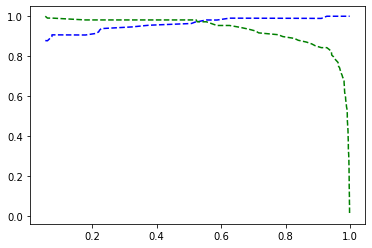

In [ ]:
def plot_precision_recall_vs_threshold(precision,recall,thresholds):
  plt.plot(thresholds, precision[:-1],"b--",label="Precision")
  plt.plot(thresholds, recall[:-1],"g--",label="Recall")

plot_precision_recall_vs_threshold(precision,recall,thresholds)

##ROC/AUC Curve
- The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
- It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate.
- One way to compare classifiers is to measure the area under the curve (AUC) of ROC curve.

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_score[:,0],pos_label=['B'])

In [ ]:
len(fpr),len(tpr),len(thresholds)

(34, 34, 34)

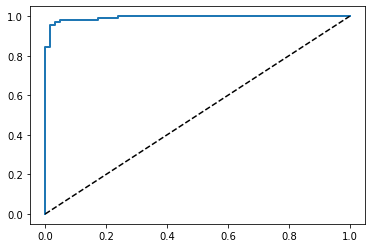

In [ ]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2)
  plt.plot([0,1],[0,1],'k--')

plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test=='B',y_score[:,0])

0.9933862433862434

**Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise.**

#Saving a machine learning model

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(model,'model.pkl') # to save the model
# my_model_loaded = joblib.load("model.pkl") # loading machine learning model back